In [1]:
from collections import Counter
import urllib
import codecs
import nltk
import numpy as np 

import pandas as pd

#downloading the webpage
import requests
import datetime

#parsing a page
from bs4 import BeautifulSoup
import re
#presentation handling
from pptx import Presentation

#file handling
from os import listdir

#WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import string

## Wczytywanie danych
### Czytania

In [2]:
df_readings = pd.read_csv('df_readings.csv', header=0, index_col=0, sep=';')
df_readings.head()

,Dzień tygodnia,Pierwsze czytanie,Psalm_ref,Psalm,Drugie czytanie,Werset przed Ewangelią,Ewangelia
2019-02-03,Sunday,Za panowania Jozjasza Pan skierował do mnie na...,"Będę wysławiał pomoc Twoją, Panie","W Tobie, Panie, ucieczka moja, niech wstydu ni...","Starajcie się o większe dary, a ja wam wskażę ...","Pan posłał Mnie, abym ubogim niósł dobrą now...","Kiedy Jezus przyszedł do Nazaretu, przemówił d..."
2019-02-02,Saturday,"To mówi Pan Bóg: ""Oto Ja wyślę anioła mego, ab...","Pan Bóg Zastępów, On jest Królem chwały","Bramy, podnieście swe szczyty, unieście się, o...","Ponieważ dzieci uczestniczą we krwi i ciele, d...",Światło na oświecenie pogan i chwała ludu Tw...,Gdy upłynęły dni oczyszczenia Maryi według Pra...
2019-02-01,Friday,"Przypomnijcie sobie dawniejsze dni, kiedy to p...",Zbawienie prawych pochodzi od Pana,"Miej ufność w Panu i czyń to, co dobre, a będz...",None,"Wysławiam Cię, Ojcze, Panie nieba i ziemi, ż...","Jezus mówił do tłumów: ""Z królestwem Bożym dzi..."
2019-01-31,Thursday,"Bracia, mamy pewność, iż wejdziemy do Miejsca ...","Oto lud wierny, szukający Boga","Do Pana należy ziemia i wszystko, co ją napełn...",None,", 105) Twoje słowo jest pochodnią dla stóp mo...","Jezus mówił ludowi: ""Czy po to wnosi się świat..."
2019-01-30,Wednesday,Każdy kapłan Starego Testamentu staje codzienn...,"Jesteś kapłanem, tak jak Melchizedek","Rzekł Pan do Pana mego: ""Siądź po mojej prawic...",None,"Ziarnem jest słowo Boże, a siewcą jest Chrys...",Jezus znowu zaczął nauczać nad jeziorem i bard...


In [3]:
df_cleaned = df_readings.dropna()

In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 2019-02-03 to 2018-09-27
Data columns (total 7 columns):
Dzień tygodnia            128 non-null object
Pierwsze czytanie         128 non-null object
Psalm_ref                 128 non-null object
Psalm                     128 non-null object
Drugie czytanie           128 non-null object
Werset przed Ewangelią    128 non-null object
Ewangelia                 128 non-null object
dtypes: object(7)
memory usage: 8.0+ KB


In [5]:
df_readings['Ewangelia'][0]

'Kiedy Jezus przyszedł do Nazaretu, przemówił do ludu w synagodze: "Dziś spełniły się te słowa Pisma, które słyszeliście". A wszyscy przyświadczali Mu i dziwili się pełnym łaski słowom, które płynęły z ust Jego. I mówili: "Czy nie jest to syn Józefa?" Wtedy rzekł do nich: "Z pewnością powiecie Mi to przysłowie: Lekarzu, ulecz samego siebie; dokonajże i tu, w swojej ojczyźnie, tego, co wydarzyło się, jak słyszeliśmy, w Kafarnaum". I dodał: "Zaprawdę, powiadam wam: Żaden prorok nie jest mile widziany w swojej ojczyźnie. Naprawdę, mówię wam: Wiele wdów było w Izraelu za czasów Eliasza, kiedy niebo pozostawało zamknięte przez trzy lata i sześć miesięcy, tak że wielki głód panował w całym kraju; a Eliasz do żadnej z nich nie został posłany, tylko do owej wdowy w Sarepcie Sydońskiej. I wielu trędowatych było w Izraelu za proroka Elizeusza, a żaden z nich nie został oczyszczony, tylko Syryjczyk Naaman". Na te słowa wszyscy w synagodze unieśli się gniewem. Porwawszy się z miejsc, wyrzucili Go 

### Piosenki

In [2]:
df_songs = pd.read_csv('df_songs.csv', header=0, index_col=0)
df_songs.head()

,Tytuł,Tekst
0,Abba Ojcze,Ty wyzwoliłeś nas Panie z kajdan i samych sie...
1,Alleluja (Niech zabrzmi Panu),"Alleluja, Alleluja, Alleluja, Alleluja. Nie..."
2,"Alleluja, Alleluja, Amen Amen, Alleluja","Alleluja, Alleluja, Amen, Amen, Alleluja. ..."
3,"Blisko, blisko, blisko jesteś","Blisko, blisko, blisko Jesteś Panie mój Blisk..."
4,Bo góry mogą ustąpić,Bo góry mogą ustąpić i pagórki się zachwiać. ...


In [3]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 2 columns):
Tytuł    187 non-null object
Tekst    187 non-null object
dtypes: object(2)
memory usage: 4.4+ KB


## Pobieranie danych
### Piosenki

#### Inicjalizacja pd.DataFrame dla piosenek

In [2]:
df_p = pd.DataFrame(data=None, index=None, #pd.date_range('1/1/2019', periods=10, freq='D'), 
                  columns = ["Tytuł","Tekst"])
df_p.head()

,Tytuł,Tekst


In [3]:
def parse_presentation(presentation_path):
    prs = Presentation(presentation_path)
    text = str()
    for slide in prs.slides:
        for shape in slide.shapes:
            if not shape.has_text_frame:
                continue
            for paragraph in shape.text_frame.paragraphs:
                for run in paragraph.runs:
                    text = text + run.text + ' '
    return text

In [4]:
def clean_song(text):
    cleaner = re.compile('Ref\.|REFREN|[0-9]\.|\/x2')
    cleantext = re.sub(cleaner, '',text)
    #tokens = re.split('\W+', text)
    #cleaned = " ".join([word.lower() for word in cleantext if word.isalpha()])
    return cleantext

In [6]:
i=0
for file in listdir('prezentacje'):
    path = 'prezentacje/' + file
    song_name = file[:-5]
    text = parse_presentation(path)
    df_p.loc[i] = [song_name, clean_song(text)]
    i=i+1
print(i)

188


In [8]:
path = 'prezentacje/Abba Ojcze.pptx'
song = parse_presentation(path)
print(song)

Ty wyzwoliłeś nas Panie  z kajdan i samych siebie,  a Chrystus stając się bratem  nauczył nas wołać do Ciebie:  Abba Ojcze! Abba Ojcze! Abba Ojcze! 2. Bo Kościół jak drzewo życia w wieczności zapuszcza korzenie, przenika naszą codzienność i pokazuje nam Ciebie. Abba Ojcze! Abba Ojcze! Abba Ojcze! 3. Bóg hojnym Dawcą jest życia, on wyswobodził nas z śmierci i przygarniając do siebie uczynił swoimi dziećmi. Abba Ojcze! Abba Ojcze! Abba Ojcze! 4. Wszyscy jesteśmy braćmi, jesteśmy jedną rodziną. Tej prawdy nic już nie zaćmi i teraz jest jej godzina. Abba Ojcze! Abba Ojcze! Abba Ojcze! 


In [9]:
df_p.head()

,Tytuł,Tekst
0,Abba Ojcze - Kopia,Ty wyzwoliłeś nas Panie z kajdan i samych sie...
1,Abba Ojcze,Ty wyzwoliłeś nas Panie z kajdan i samych sie...
2,Alleluja (Niech zabrzmi Panu),"Alleluja, Alleluja, Alleluja, Alleluja. Nie..."
3,"Alleluja, Alleluja, Amen Amen, Alleluja","Alleluja, Alleluja, Amen, Amen, Alleluja. ..."
4,"Blisko, blisko, blisko jesteś","Blisko, blisko, blisko Jesteś Panie mój Blisk..."


In [249]:
text = df_p.iloc[2]['Tekst']
text

' Alleluja, Alleluja,  Amen, Amen, Alleluja.   Pokłońmy się przed Nim –  On naszym Panem jest  Pokłońmy się przed Nim –  On naszym Panem Amen, Amen, Alleluja.  Alleluja, Alleluja,  Amen, Amen, Alleluja.   Jezus Chrystus zmartwychwstał –  On naszym Panem jest  Jezus Chrystus zmartwychwstał –  On naszym Panem Amen, Amen, Alleluja.  Alleluja, Alleluja,  Amen, Amen, Alleluja.   Radujmy się bracia –  On naszym Panem jest  Radujmy się wszyscy –  On naszym Panem. Amen, Amen, Alleluja.  Alleluja, Alleluja,  Amen, Amen, Alleluja.   Posyła nam Ducha –  On naszym Panem jest  Posyła nam Ducha –  On naszym Panem. Amen, Amen, Alleluja. '

In [250]:
df_p.to_csv(path_or_buf= 'df_songs.csv', header=df_p.columns)

## Czytania danego dnia

In [13]:
def get_readings(address, day_name):
    page = requests.get(address)
    soup = BeautifulSoup(page.content, 'html.parser')
    #print(soup.prettify()) 
    #Exception handling for more readings
    try:
        #section = list(soup.children)[9]
        #section_content = section.find_all('p')   
        section = list(soup.children)
        #if len(section) != 30:
            #print(len(section), address, day_name)
        section_content1 = section[2].find_all('p')
        if ((day_name == 'Sunday') or (len(section) in [32,34])):
            section_content2 = section[6]
            section_content3 = section[8]
            section_content4 = section[12]
        else:
            section_content2 = None
            section_content3 = section[4]
            section_content4 = section[8]
            
        pierwsze_czytanie = str(section_content1[6])
        drugie_czytanie = str(section_content2)
        tekst_przed_ewangelia = str(section_content3)
        psalm_ref = str(section_content1[7])
        psalm = ""
        i = 8
        while i < len(section_content1):
            psalm += str(section_content1[i])
            i += 1
        ewangelia = str(section_content4)
        document = [pierwsze_czytanie,psalm_ref,psalm, drugie_czytanie, tekst_przed_ewangelia, ewangelia]
        return document
    except:
        pass
        #section = soup.find_all('section')[0]
        #section_content =section.find_all('p')

In [16]:
#czytanie na dziś
now = datetime.datetime.now()
today = datetime.date.today()
year = str(now.year)
month = str(now.month)
if len(month) == 1:
    month = "0" + month

day = str(now.day)
if len(day) == 1:
    day = "0" + day

ymd = year+month+day
today_name = now.strftime("%A")
day_name = today_name
#today_name = 'Sunday'

address = "http://mateusz.pl/czytania/" + year + "/" + ymd + ".html"
#address = "http://mateusz.pl/czytania/2018/20181021.html" #niedziela
doc = get_readings(address, today)
#print(address)

In [10]:
today_name

'Monday'

In [19]:
doc[5] #ewangelia

'<p>\r\n                        (Mk 5, 1-20) <br>\r\n                        Jezus i uczniowie Jego przybyli na drugą stronę jeziora do kraju Gerazeńczyków. Gdy wysiadł z łodzi, zaraz wyszedł Mu naprzeciw z grobowców człowiek opętany przez ducha nieczystego. Mieszkał on stale w grobowcach i nikt już nawet łańcuchem nie mógł go związać. Często bowiem nakładano mu pęta i łańcuchy; ale łańcuchy kruszył, a pęta rozrywał, i nikt nie zdołał go poskromić. Wciąż dniem i nocą w grobowcach i po górach krzyczał i tłukł się kamieniami. Skoro z daleka ujrzał Jezusa, przybiegł, oddał Mu pokłon i zawołał wniebogłosy: "Czego chcesz ode mnie, Jezusie, Synu Boga Najwyższego? Zaklinam Cię na Boga, nie dręcz mnie!" Powiedział mu bowiem: "Wyjdź, duchu nieczysty, z tego człowieka". I zapytał go: "Jak ci na imię?" Odpowiedział Mu: "Na imię mi „Legion”, bo nas jest wielu". I zaczął prosić Go usilnie, żeby ich nie wyganiał z tej okolicy. A pasła się tam na górze wielka trzoda świń. Prosiły Go więc złe duchy: "

In [11]:
def get_adresses(n):
    adresses = []
    date_list = [base - datetime.timedelta(days=x) for x in range(0, n)]
    dates_cleaned = [str(x).replace('-','') for x in date_list]
    for date in dates_cleaned:
        ymd = date
        address = "http://mateusz.pl/czytania/" + ymd[:4]+ "/" + ymd + ".html"
        adresses.append(address)
    return adresses

In [12]:
#get_adresses(140)

#### Inicjalizacja pd.DataFrame dla czytań

In [154]:
df_raw = pd.DataFrame(data=None, index=None, #pd.date_range('1/1/2019', periods=10, freq='D'), 
                  columns = ["Dzień tygodnia","Pierwsze czytanie", "Psalm_ref", "Psalm", "Drugie czytanie", 
                                                    "Werset przed Ewangelią", "Ewangelia"])
df_raw.head()

,Dzień tygodnia,Pierwsze czytanie,Psalm_ref,Psalm,Drugie czytanie,Werset przed Ewangelią,Ewangelia


## Noise removal // Cleaning

In [7]:
#first phase - for easy reading
def clean_html(raw):
    cleaner = re.compile('<.*?>')
    cleantext = re.sub(cleaner, '', raw)
    return cleantext

def clean_proverbs (raw):
    cleaner = re.compile('\([^)]*\)')
    cleantext = re.sub(cleaner, '',raw)
    return cleantext

def clean_indent(raw):
    cleaner = re.compile('^\s+')
    cleantext = re.sub(cleaner, '',raw)
    return cleantext

def clean_rest(text):
    cleaner = re.compile('\\r\\n\s+')
    cleantext = re.sub(cleaner, '',text)
    return cleantext

def clean_rest2(text):
    cleaner = re.compile('(\\r\\n)')
    cleantext = re.sub(cleaner, ' ',text)
    return cleantext

def clean_carriage(text):
    cleaner = re.compile('(.*)\n')
    cleantext = re.sub(cleaner, '',text)
    return cleantext

def clean_psalmus(text):
    cleaner = re.compile('Aklamacja|REFREN\:\s|Bracia\:\s')
    cleantext = re.sub(cleaner, '',text)
    return cleantext

def clean_text(raw):
    text = clean_html(raw)
    text = clean_proverbs(text)
    text = clean_indent(text)
    text = clean_rest(text)
    text = clean_rest2(text)
    text = clean_carriage(text)
    text = clean_psalmus(text)
    return text


In [8]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [157]:
n=130
base = datetime.date.today()
date_list = [base - datetime.timedelta(days=x) for x in range(0, n)]
#print(date_list)
dates_cleaned = [str(x).replace('-','') for x in date_list]
#print(dates_cleaned)
dates_names = [x.strftime("%A") for x in date_list]
#print(dates_names)
adresses = get_adresses(n)
#print(adresses)

for i in range(n):
        doc = get_readings(adresses[i], dates_names[i])
        #doc_cleaned = [clean_text(str(text)) for text in doc]
        input_row = [dates_names[i]]
        for each in doc: #doc_cleaned:
            input_row.append(each)
        df_raw.loc[date_list[i]] = input_row



In [255]:
df_raw.set_index(pd.Index([str(x) for x in df_raw.index]), inplace=True)

In [256]:
df_raw.tail()

,Dzień tygodnia,Pierwsze czytanie,Psalm_ref,Psalm,Drugie czytanie,Werset przed Ewangelią,Ewangelia
2018-10-01,Monday,"<p>\r\n (Hi 1, 6-22) <b...","<p>\r\n (Ps 17 (16), 1b...","<p>Rozważ, Panie, moją słuszną sprawę,<br/> \r...",None,<p>\r\n Aklamacja (...,"<p>\r\n (Łk 9, 46-50) <..."
2018-09-30,Sunday,"<p>\r\n (Lb 11, 25-29) ...","<p>\r\n (Ps 19 (18), 8 ...",<p>Prawo Pańskie jest doskonałe i pokrzepia du...,"<p>\r\n (Jk 5, 1-6) <br...",<p>\r\n Aklamacja (...,"<p>\r\n (Mk 9, 38-43. 4..."
2018-09-29,Saturday,"<p>\r\n (Dn 7, 9-10. 13...","<p>\r\n (Ps 138, 1-2a. ...","<p>Będę Cię sławił, Panie, z całego serca,<br/...",None,<p>\r\n Aklamacja (...,"<p>\r\n (J 1, 47-51) <b..."
2018-09-28,Friday,"<p>\r\n (Koh 3, 1-11) <...","<p>\r\n (Ps 144 (143), ...","<p>Błogosławiony Pan, Opoka moja.<br/> \r\n\t...",None,<p>\r\n Aklamacja (...,"<p>\r\n (Łk 9, 18-22) <..."
2018-09-27,Thursday,"<p>\r\n (Koh 1, 2-11) <...","<p>\r\n (Ps 90 (89), 3-...",<p>Obracasz w proch człowieka<br/> \r\n\t\ti m...,None,<p>\r\n Aklamacja (...,"<p>\r\n (Łk 9, 7-9) <br..."


In [257]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 2019-02-03 to 2018-09-27
Data columns (total 7 columns):
Dzień tygodnia            130 non-null object
Pierwsze czytanie         130 non-null object
Psalm_ref                 130 non-null object
Psalm                     130 non-null object
Drugie czytanie           130 non-null object
Werset przed Ewangelią    130 non-null object
Ewangelia                 130 non-null object
dtypes: object(7)
memory usage: 8.1+ KB


In [160]:
df_cleaned = df_raw.copy()

In [161]:
for each in df_cleaned.columns:
    df_cleaned[each] = df_cleaned[each].apply(lambda x: clean_text(x))

In [9]:
df_cleaned.iloc[40][6]

'Na początku było Słowo, a Słowo było u Boga, i Bogiem było Słowo. Ono było na początku u Boga. Wszystko przez Nie się stało, a bez Niego nic się nie stało, co się stało. W Nim było życie, a życie było światłością ludzi, a światłość w ciemności świeci i ciemność jej nie ogarnęła. Pojawił się człowiek posłany przez Boga, Jan mu było na imię. Przyszedł on na świadectwo, aby zaświadczyć o Światłości, by wszyscy uwierzyli przez niego. Nie był on światłością, lecz posłanym, aby zaświadczyć o Światłości. Była Światłość prawdziwa, która oświeca każdego człowieka, gdy na świat przychodzi. Na świecie było Słowo, a świat stał się przez Nie, lecz świat Go nie poznał. Przyszło do swojej własności, a swoi Go nie przyjęli. Wszystkim tym jednak, którzy Je przyjęli, dało moc, aby się stali dziećmi Bożymi, tym, którzy wierzą w imię Jego, którzy ani z krwi, ani z żądzy ciała, ani z woli męża, ale z Boga się narodzili. Słowo stało się ciałem i zamieszkało między nami. I oglądaliśmy Jego chwałę, chwałę, j

In [10]:
df_cleaned.tail()

,Dzień tygodnia,Pierwsze czytanie,Psalm_ref,Psalm,Drugie czytanie,Werset przed Ewangelią,Ewangelia
2018-10-01,Monday,"Pewnego dnia, gdy synowie Boży przyszli stawić...","Nakłoń swe ucho, usłysz moje słowo","Rozważ, Panie, moją słuszną sprawę, usłysz me ...",None,"Syn Człowieczy przyszedł, żeby służyć i dać ...","Uczniom Jezusa przyszła myśl, kto z nich jest ..."
2018-09-30,Sunday,Pan zstąpił w obłoku i mówił z Mojżeszem. Wzią...,Nakazy Pana są radością serca,Prawo Pańskie jest doskonałe i pokrzepia duszę...,"A teraz wy, bogacze, zapłaczcie wśród narzekań...","Słowo Twoje, Panie, jest prawdą, uświęć nas ...","Apostoł Jan rzekł do Jezusa: ""Nauczycielu, wid..."
2018-09-29,Saturday,"Patrzałem, aż postawiono trony, a Przedwieczny...",Wobec aniołów psalm zaśpiewam Panu,"Będę Cię sławił, Panie, z całego serca, bo us...",None,"Błogosławcie Pana, wszyscy Jego aniołowie, w...","Jezus ujrzał, jak Natanael zbliżał się do Nieg..."
2018-09-28,Friday,"Wszystko ma swój czas, i jest wyznaczona godzi...","Błogosławiony Pan, Opoka moja","Błogosławiony Pan, Opoka moja. On mocą i waro...",None,"Syn Człowieczy przyszedł, żeby służyć i dać ...","Gdy raz Jezus modlił się na osobności, a byli ..."
2018-09-27,Thursday,"Marność nad marnościami, powiada Kohelet, marn...","Panie, Ty zawsze byłeś nam ucieczką","Obracasz w proch człowieka i mówisz: ""Wracajci...",None,"Ja jestem drogą i prawdą, i życiem. Nikt nie...",Tetrarcha Herod posłyszał o wszystkich cudach ...


In [258]:
df_raw.loc['2019-01-19']['Psalm']

'<p>Prawo Pańskie jest doskonałe i pokrzepia duszę,<br/>\r\nświadectwo Pana jest pewne, nierozważnego uczy mądrości.<br/>\r\nJego słuszne nakazy radują serce,<br/>\r\njaśnieje przykazanie Pana i olśniewa oczy.</p><p>Bojaźń Pana jest szczera i trwa na wieki,<br/>\r\nsądy Pana prawdziwe, wszystkie razem słuszne.<br/>\r\nNiech znajdą uznanie przed Tobą<br/>\r\nsłowa ust moich i myśli mego serca,<br/>\r\nPanie, moja Opoko i mój Zbawicielu.</p><p>Prawo Pańskie jest doskonałe i pokrzepia duszę,<br/>\r\nświadectwo Pana jest pewne, nierozważnego uczy mądrości<br/>.\r\nJego słuszne nakazy radują serce,<br/>\r\njaśnieje przykazanie Pana i olśniewa oczy.</p><p>Bojaźń Pana jest szczera i trwa na wieki,<br/>\r\nsądy Pana prawdziwe, wszystkie razem słuszne.<br/>\r\nNiech znajdą uznanie przed Tobą<br/>\r\nsłowa ust moich i myśli mego serca,<br/>\r\nPanie, moja Opoko i mój Zbawicielu.</p>'

In [252]:
df_cleaned.loc['2019-01-19']['Psalm']

'Prawo Pańskie jest doskonałe i pokrzepia duszę, świadectwo Pana jest pewne, nierozważnego uczy mądrości. Jego słuszne nakazy radują serce, jaśnieje przykazanie Pana i olśniewa oczy.Bojaźń Pana jest szczera i trwa na wieki, sądy Pana prawdziwe, wszystkie razem słuszne. Niech znajdą uznanie przed Tobą słowa ust moich i myśli mego serca, Panie, moja Opoko i mój Zbawicielu.Prawo Pańskie jest doskonałe i pokrzepia duszę, świadectwo Pana jest pewne, nierozważnego uczy mądrości. Jego słuszne nakazy radują serce, jaśnieje przykazanie Pana i olśniewa oczy.Bojaźń Pana jest szczera i trwa na wieki, sądy Pana prawdziwe, wszystkie razem słuszne. Niech znajdą uznanie przed Tobą słowa ust moich i myśli mego serca, Panie, moja Opoko i mój Zbawicielu.'

In [184]:
df_cleaned.index[1]

'2019-02-02'

In [185]:
df_cleaned.to_csv(path_or_buf= 'df_readings.csv', header=df_cleaned.columns, sep=';')

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 2019-02-03 to 2018-09-27
Data columns (total 7 columns):
Dzień tygodnia            128 non-null object
Pierwsze czytanie         128 non-null object
Psalm_ref                 128 non-null object
Psalm                     128 non-null object
Drugie czytanie           128 non-null object
Werset przed Ewangelią    128 non-null object
Ewangelia                 128 non-null object
dtypes: object(7)
memory usage: 8.0+ KB


In [6]:
text = df_cleaned.loc['2019-01-19']['Ewangelia']
print(text)

Jezus wyszedł znowu nad jezioro. Cały lud przychodził do Niego, a On go nauczał. A przechodząc, ujrzał Lewiego, syna Alfeusza, siedzącego na komorze celnej, i rzekł do niego: "Pójdź za Mną!" Ten wstał i poszedł za Nim. Gdy Jezus siedział w jego domu przy stole, wielu celników i grzeszników siedziało razem z Jezusem i Jego uczniami. Wielu bowiem było tych, którzy szli za Nim. Niektórzy uczeni w Piśmie, spośród faryzeuszów, widząc, że je z grzesznikami i celnikami, mówili do Jego uczniów: "Czemu On je i pije z celnikami i grzesznikami?" Jezus, usłyszawszy to, rzekł do nich: "Nie potrzebują lekarza zdrowi, lecz ci, którzy się źle mają. Nie przyszedłem, aby powołać sprawiedliwych, ale grzeszników".


In [7]:
text

'Jezus wyszedł znowu nad jezioro. Cały lud przychodził do Niego, a On go nauczał. A przechodząc, ujrzał Lewiego, syna Alfeusza, siedzącego na komorze celnej, i rzekł do niego: "Pójdź za Mną!" Ten wstał i poszedł za Nim. Gdy Jezus siedział w jego domu przy stole, wielu celników i grzeszników siedziało razem z Jezusem i Jego uczniami. Wielu bowiem było tych, którzy szli za Nim. Niektórzy uczeni w Piśmie, spośród faryzeuszów, widząc, że je z grzesznikami i celnikami, mówili do Jego uczniów: "Czemu On je i pije z celnikami i grzesznikami?" Jezus, usłyszawszy to, rzekł do nich: "Nie potrzebują lekarza zdrowi, lecz ci, którzy się źle mają. Nie przyszedłem, aby powołać sprawiedliwych, ale grzeszników".'

### Tłumaczenie

In [4]:
from googletrans import Translator 

In [5]:
t = Translator()
#t.translate(text)

In [14]:
df_eng = pd.read_csv('df_eng_readings.csv', header=0, index_col=0)
df_eng.tail()

,Dzień tygodnia,Pierwsze czytanie,Psalm_ref,Psalm,Drugie czytanie,Werset przed Ewangelią,Ewangelia
2019-01-17,Thursday,"Proceed, as the Holy Spirit says: ""Today, if y...","Hear not the hearts of the Lord, harden your h...","Come, let us adore Him, falling on our faces, ...",None,Jesus preached the gospel of the kingdom and h...,"One day, he came to the leper of Jesus and, fa..."
2019-01-16,Wednesday,Because children have a share in their blood a...,God remembers his covenant,"Praise the Lord, call upon His name, preach Hi...",None,"My sheep hear my voice, I know them, and they ...",After leaving the synagogue Jesus came with Ja...
2019-01-15,Tuesday,God has not surrendered to the angels of the f...,You gave the Son authority over his work,"O Lord, our Lord, how wonderful is Your name t...",None,Accept the word of God not as a human word but...,"In Capernaum, Jesus entered the synagogue on t..."
2019-01-14,Monday,Many times and in various ways God spoke to ou...,"Pay homage to Him, all angels","The Lord reigns, be glad, earth, rejoice, many...",None,The kingdom of God is close. Repent and believ...,"When John was imprisoned, Jesus came to Galile..."
2019-01-13,Sunday,"This is what the Lord God says: ""Behold, I wil...","Lord God of hosts, He is the King of glory","Gates, raise your peaks, stand out, eternal do...",Because children are involved in blood and bod...,Light on the enlightenment of the Gentiles and...,When the days of the purification of Mary acco...


In [15]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 2019-02-01 to 2019-01-13
Data columns (total 7 columns):
Dzień tygodnia            20 non-null object
Pierwsze czytanie         20 non-null object
Psalm_ref                 20 non-null object
Psalm                     20 non-null object
Drugie czytanie           20 non-null object
Werset przed Ewangelią    20 non-null object
Ewangelia                 20 non-null object
dtypes: object(7)
memory usage: 1.2+ KB


### Tłumaczenie df_cleaned

In [78]:
df=pd.DataFrame(index=df_cleaned.index)
df.head()

""
2019-02-03
2019-02-02
2019-02-01
2019-01-31
2019-01-30


In [79]:
df['Ewangelia'] = df_cleaned['Ewangelia'].apply(lambda x: t.translate(x))

In [89]:
df['Ewangelia'] = df['Ewangelia'].apply(lambda x: x.text)

In [90]:
df.head()

,Ewangelia
2019-02-03,"When Jesus came to Nazareth, he spoke to the p..."
2019-02-02,When the days of the purification of Mary acco...
2019-02-01,"Jesus said to the multitudes: ""The kingdom of ..."
2019-01-31,"Jesus said to the people, ""Is this why light i..."
2019-01-30,Jesus again began to teach at the lake and a v...


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 2019-02-03 to 2018-09-27
Data columns (total 1 columns):
Ewangelia    128 non-null object
dtypes: object(1)
memory usage: 7.0+ KB


In [32]:
df_eng.tail()

,Dzień tygodnia,Pierwsze czytanie,Psalm_ref,Psalm,Drugie czytanie,Werset przed Ewangelią,Ewangelia
2019-01-17,Thursday,"Proceed, as the Holy Spirit says: ""Today, if y...","Hear not the hearts of the Lord, harden your h...","Come, let us adore Him, falling on our faces, ...",None,Jesus preached the gospel of the kingdom and h...,"One day, he came to the leper of Jesus and, fa..."
2019-01-16,Wednesday,Because children have a share in their blood a...,God remembers his covenant,"Praise the Lord, call upon His name, preach Hi...",None,"My sheep hear my voice, I know them, and they ...",After leaving the synagogue Jesus came with Ja...
2019-01-15,Tuesday,God has not surrendered to the angels of the f...,You gave the Son authority over his work,"O Lord, our Lord, how wonderful is Your name t...",None,Accept the word of God not as a human word but...,"In Capernaum, Jesus entered the synagogue on t..."
2019-01-14,Monday,Many times and in various ways God spoke to ou...,"Pay homage to Him, all angels","The Lord reigns, be glad, earth, rejoice, many...",None,The kingdom of God is close. Repent and believ...,"When John was imprisoned, Jesus came to Galile..."
2019-01-13,Sunday,"This is what the Lord God says: ""Behold, I wil...","Lord God of hosts, He is the King of glory","Gates, raise your peaks, stand out, eternal do...",Because children are involved in blood and bod...,Light on the enlightenment of the Gentiles and...,When the days of the purification of Mary acco...


In [92]:
#zapis do CSV
#df_eng.to_csv(path_or_buf= 'df_eng_readings.csv', header=df_eng.columns, sep=;)
df.to_csv(path_or_buf='df_eng_gospel.csv', header=df.columns)

### Tłumaczenie df_p

In [12]:
df_songs['Eng'] = df_songs['Eng'].apply(lambda x: x.text)

In [13]:
df_songs.head()

,Tytuł,Tekst,Eng
0,Abba Ojcze,Ty wyzwoliłeś nas Panie z kajdan i samych sie...,"You delivered us from chains and ourselves, an..."
1,Alleluja (Niech zabrzmi Panu),"Alleluja, Alleluja, Alleluja, Alleluja. Nie...","Alleluia, Alleluia, Alleluia, Alleluia. Let th..."
2,"Alleluja, Alleluja, Amen Amen, Alleluja","Alleluja, Alleluja, Amen, Amen, Alleluja. ...","Alleluia, Alleluia, Amen, Amen, Alleluia. Let ..."
3,"Blisko, blisko, blisko jesteś","Blisko, blisko, blisko Jesteś Panie mój Blisk...","Close, close, close You are my Lord, Close to ..."
4,Bo góry mogą ustąpić,Bo góry mogą ustąpić i pagórki się zachwiać. ...,Because the mountains can give way and the hil...


In [15]:
df_songs.to_csv(path_or_buf='df_eng_songs.csv', header=df_songs.columns)

In [77]:
df_p_eng = df_p.copy()
for each in df_p_eng.columns:
    df_p_eng[each] = df_p_eng[each].apply(lambda x: str(translator.translate(x).text))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
df_p_eng.head()

In [ ]:
#zapis do CSV
df_p_eng.to_csv(path_or_buf= 'df_eng_songs.csv', header=df_p_eng.columns)

## Tokenization & Segmentation

In [33]:
sentences = nltk.sent_tokenize(text)
sentences[:5]

['Jezus wyszedł znowu nad jezioro.',
 'Cały lud przychodził do Niego, a On go nauczał.',
 'A przechodząc, ujrzał Lewiego, syna Alfeusza, siedzącego na komorze celnej, i rzekł do niego: "Pójdź za Mną!"',
 'Ten wstał i poszedł za Nim.',
 'Gdy Jezus siedział w jego domu przy stole, wielu celników i grzeszników siedziało razem z Jezusem i Jego uczniami.']

In [34]:
tokens = nltk.word_tokenize(text)
lower_tokens = [t.lower() for t in tokens]
print(lower_tokens)

['jezus', 'wyszedł', 'znowu', 'nad', 'jezioro', '.', 'cały', 'lud', 'przychodził', 'do', 'niego', ',', 'a', 'on', 'go', 'nauczał', '.', 'a', 'przechodząc', ',', 'ujrzał', 'lewiego', ',', 'syna', 'alfeusza', ',', 'siedzącego', 'na', 'komorze', 'celnej', ',', 'i', 'rzekł', 'do', 'niego', ':', '``', 'pójdź', 'za', 'mną', '!', "''", 'ten', 'wstał', 'i', 'poszedł', 'za', 'nim', '.', 'gdy', 'jezus', 'siedział', 'w', 'jego', 'domu', 'przy', 'stole', ',', 'wielu', 'celników', 'i', 'grzeszników', 'siedziało', 'razem', 'z', 'jezusem', 'i', 'jego', 'uczniami', '.', 'wielu', 'bowiem', 'było', 'tych', ',', 'którzy', 'szli', 'za', 'nim', '.', 'niektórzy', 'uczeni', 'w', 'piśmie', ',', 'spośród', 'faryzeuszów', ',', 'widząc', ',', 'że', 'je', 'z', 'grzesznikami', 'i', 'celnikami', ',', 'mówili', 'do', 'jego', 'uczniów', ':', '``', 'czemu', 'on', 'je', 'i', 'pije', 'z', 'celnikami', 'i', 'grzesznikami', '?', "''", 'jezus', ',', 'usłyszawszy', 'to', ',', 'rzekł', 'do', 'nich', ':', '``', 'nie', 'potrze

## Normalization / Preprocessing

#### Lemmatyzacja (lemmatisation) 
Algorytm znajdowania lemmy, formy podstawowej wyrazu w obszarze części mowy którą reprezentuje. Inaczej: wyszukiwanie formy kanonicznej leksemu. W komputerowej analizie języka naturalnego lemmatyzacja jest operacją bardziej precyzyjną niż stemmatyzacja. 

#### Stemmatyzacja (stemming) 
Sprowadzenie wyrazu reprezentującego dowolną część mowy do stemu, rdzenia postaci źródłowej, najczęściej rzeczownika, bądź niekiedy nawet sekwencji znaków nie mającej samodzielnego znaczenia w języku naturalnym. 

In [35]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]
print(alpha_only)

['jezus', 'wyszedł', 'znowu', 'nad', 'jezioro', 'cały', 'lud', 'przychodził', 'do', 'niego', 'a', 'on', 'go', 'nauczał', 'a', 'przechodząc', 'ujrzał', 'lewiego', 'syna', 'alfeusza', 'siedzącego', 'na', 'komorze', 'celnej', 'i', 'rzekł', 'do', 'niego', 'pójdź', 'za', 'mną', 'ten', 'wstał', 'i', 'poszedł', 'za', 'nim', 'gdy', 'jezus', 'siedział', 'w', 'jego', 'domu', 'przy', 'stole', 'wielu', 'celników', 'i', 'grzeszników', 'siedziało', 'razem', 'z', 'jezusem', 'i', 'jego', 'uczniami', 'wielu', 'bowiem', 'było', 'tych', 'którzy', 'szli', 'za', 'nim', 'niektórzy', 'uczeni', 'w', 'piśmie', 'spośród', 'faryzeuszów', 'widząc', 'że', 'je', 'z', 'grzesznikami', 'i', 'celnikami', 'mówili', 'do', 'jego', 'uczniów', 'czemu', 'on', 'je', 'i', 'pije', 'z', 'celnikami', 'i', 'grzesznikami', 'jezus', 'usłyszawszy', 'to', 'rzekł', 'do', 'nich', 'nie', 'potrzebują', 'lekarza', 'zdrowi', 'lecz', 'ci', 'którzy', 'się', 'źle', 'mają', 'nie', 'przyszedłem', 'aby', 'powołać', 'sprawiedliwych', 'ale', 'grzes

In [36]:
polish_stops = codecs.open("polishStopWords",'r','utf-8')
#stopwords = nltk.corpus.stopwords.words('english')
stopwords = polish_stops.read().split('\n')
polish_stops.close()

In [37]:
# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords]
print(no_stops)

['jezus', 'wyszedł', 'jezioro', 'lud', 'przychodził', 'nauczał', 'przechodząc', 'ujrzał', 'lewiego', 'syna', 'alfeusza', 'siedzącego', 'komorze', 'celnej', 'rzekł', 'pójdź', 'wstał', 'poszedł', 'jezus', 'siedział', 'domu', 'stole', 'celników', 'grzeszników', 'siedziało', 'razem', 'jezusem', 'uczniami', 'szli', 'niektórzy', 'uczeni', 'piśmie', 'spośród', 'faryzeuszów', 'widząc', 'grzesznikami', 'celnikami', 'mówili', 'uczniów', 'pije', 'celnikami', 'grzesznikami', 'jezus', 'usłyszawszy', 'rzekł', 'potrzebują', 'lekarza', 'zdrowi', 'źle', 'przyszedłem', 'powołać', 'sprawiedliwych', 'grzeszników']


In [43]:
#z linkedin
def clean_text2(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [44]:
def clean_text3(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    #text = [ps.stem(word) for word in tokens if word not in stopwords]
    return tokens

#### Stemming

In [45]:
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [46]:
print(stemming(no_stops))

['jesu', 'said', 'multitud', 'kingdom', 'god', 'someon', 'put', 'seed', 'earth', 'whether', 'awak', 'awak', 'day', 'night', 'seed', 'sprout', 'grow', 'know', 'earth', 'yield', 'first', 'blade', 'ear', 'full', 'grain', 'ear', 'crop', 'matur', 'sickl', 'begin', 'grow', 'time', 'said', 'compar', 'kingdom', 'god', 'parabl', 'present', 'like', 'mustard', 'seed', 'smallest', 'seed', 'earth', 'sown', 'ground', 'sown', 'grow', 'becom', 'larger', 'veget', 'larg', 'branch', 'bird', 'sky', 'nest', 'mani', 'parabl', 'preach', 'far', 'could', 'understand', 'without', 'parabl', 'speak', 'explain', 'everyth', 'student', 'separ']


#### Lemmatizing

In [47]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [48]:
print(lemmatizing(no_stops))

['jesus', 'said', 'multitude', 'kingdom', 'god', 'someone', 'put', 'seed', 'earth', 'whether', 'awake', 'awake', 'day', 'night', 'seed', 'sprout', 'grows', 'know', 'earth', 'yield', 'first', 'blade', 'ear', 'full', 'grain', 'ear', 'crop', 'matures', 'sickle', 'begin', 'grow', 'time', 'said', 'compare', 'kingdom', 'god', 'parable', 'present', 'like', 'mustard', 'seed', 'smallest', 'seed', 'earth', 'sown', 'ground', 'sown', 'grows', 'becomes', 'larger', 'vegetable', 'large', 'branch', 'bird', 'sky', 'nest', 'many', 'parable', 'preached', 'far', 'could', 'understand', 'without', 'parable', 'speak', 'explained', 'everything', 'student', 'separately']


In [49]:
txt = lemmatizing(no_stops)

### Bag of words

In [50]:
bow = Counter(txt)

In [51]:
bow.most_common(10)

[('seed', 4),
 ('earth', 3),
 ('parable', 3),
 ('said', 2),
 ('kingdom', 2),
 ('god', 2),
 ('awake', 2),
 ('grows', 2),
 ('ear', 2),
 ('sown', 2)]

### Word cloud

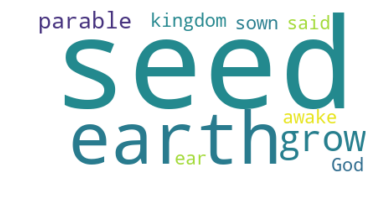

In [52]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stopwords, 
                      max_font_size=150, 
                      max_words=10, 
                      background_color="white").generate(clean_text(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Statystyki

#### Term frequency

In [53]:
fdist = nltk.probability.FreqDist(txt)

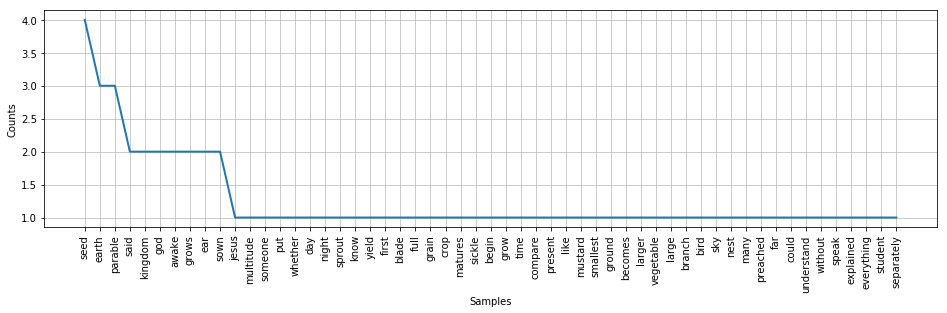

In [54]:
plt.figure(figsize=(16,4))
fdist_plot = fdist.plot()
plt.show()

In [55]:
#occurs only once
print(fdist.hapaxes())

['jesus', 'multitude', 'someone', 'put', 'whether', 'day', 'night', 'sprout', 'know', 'yield', 'first', 'blade', 'full', 'grain', 'crop', 'matures', 'sickle', 'begin', 'grow', 'time', 'compare', 'present', 'like', 'mustard', 'smallest', 'ground', 'becomes', 'larger', 'vegetable', 'large', 'branch', 'bird', 'sky', 'nest', 'many', 'preached', 'far', 'could', 'understand', 'without', 'speak', 'explained', 'everything', 'student', 'separately']


In [56]:
def lexical_diversity(text):
    return len(text)/len(set(text))

def percentage(count,total):
    return 100 * count/total

In [57]:
lexical_diversity(text)

23.594594594594593

In [58]:
percentage(text.count(bow.most_common(1)[0][0]),len(text))

0.4581901489117984

In [59]:
#to fix
#text.dispersion_plot(keys)

### N-Grams

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
#PL
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(df_cleaned['Ewangelia'].apply(lambda x: clean_text(x)))

print(X_counts.shape)
print(ngram_vect.get_feature_names()[:10])

(20, 2273)
['abiatara najwyższego', 'aby czytać', 'aby go', 'aby na', 'aby patrzyli', 'aby postąpić', 'aby powołać', 'abym obwoływał', 'abym tam', 'abym ubogim']


In [62]:
X_ngram_df = pd.DataFrame(X_counts.toarray())
X_ngram_df.columns = ngram_vect.get_feature_names()
X_ngram_df

,abiatara najwyższego,aby czytać,aby go,aby na,aby patrzyli,aby postąpić,aby powołać,abym obwoływał,abym tam,abym ubogim,...,żniwo mówił,żniwo wprawdzie,życia nie,życie uratować,żydowskich oczyszczeń,żyzną są,żyzną wydawały,żył jerozolimie,żyła mężem,żądze wciskają
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
#ENG
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(df_eng['Ewangelia'].apply(lambda x: clean_text(x)))

print(X_counts.shape)
print(ngram_vect.get_feature_names()[:10])

(20, 2437)
['abandoned the', 'abiathar the', 'able to', 'about all', 'about him', 'about how', 'about the', 'above the', 'absolute certainty', 'accept it']


In [64]:
X_ngram_df = pd.DataFrame(X_counts.toarray())
X_ngram_df.columns = ngram_vect.get_feature_names()
X_ngram_df

,abandoned the,abiathar the,able to,about all,about him,about how,about the,above the,absolute certainty,accept it,...,your people,your salvation,your servant,your sins,your soul,your word,yourself to,zajordania and,zebedee and,zebedee followed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#PL
ngram_vect_p = CountVectorizer(ngram_range=(2,2))
X_counts_p = ngram_vect_p.fit_transform(df_p['Tekst'])

print(X_counts_p.shape)
print(ngram_vect_p.get_feature_names()[:10])

(187, 6883)
['abba ojcze', 'abrahama izaaka', 'abrahama pomny', 'abrahama ref', 'abrahamowi jego', 'aby każdy', 'aby nami', 'aby nas', 'aby niewinnie', 'aby twój']


In [66]:
#ENG
ngram_vect_p = CountVectorizer(ngram_range=(2,2))
X_counts_p = ngram_vect_p.fit_transform(df_p_eng['Tekst'])

print(X_counts_p.shape)
print(ngram_vect_p.get_feature_names()[:10])

(187, 6883)
['abba ojcze', 'abrahama izaaka', 'abrahama pomny', 'abrahama ref', 'abrahamowi jego', 'aby każdy', 'aby nami', 'aby nas', 'aby niewinnie', 'aby twój']


### Tf-idf 

#### Term frequency - inverse document frequency
Ważenie częstością termów - odwrotna częstość w dokumentach - jedna z metod obliczania wagi słów w oparciu o liczbę ich wystąpień, należąca do grupy algorytmów obliczających statystyczne wagi termów. 
- Każdy dokument reprezentowany jest przez wektor, składający się z wag słów występujących w tym dokumencie. 
- TFIDF informuje o częstości wystąpienia termów uwzględniając jednocześnie odpowiednie wyważenie znaczenia lokalnego termu i jego znaczenia w kontekście pełnej kolekcji dokumentów. 

https://pl.wikipedia.org/wiki/TFIDF

- Pozwala na określenie rzadkich, ale ważnych słów każdym dokumencie

$$w(i,j) = tf(i,j) * log(\frac{N}{df(i)})$$

gdzie:

>* w(i,f) - waga tokenu i w dokumencie j
>* tf(i,j) - liczba wystąpień tokenu i w dokumencie j
>* df(i) - licza dokumentów zawierających token i
>*N - liczba wszystkich dokumentów

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
#PL
tfidf_vect = TfidfVectorizer(analyzer=clean_text3)
X_tfidf = tfidf_vect.fit_transform(df_raw['Ewangelia'].apply(lambda x: clean_text(x)))
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names()[:10])

(20, 1290)
['5', 'A', 'Abiatara', 'Alfeusza', 'Andrzeja', 'Anna', 'Asera', 'Bacz', 'Baczcie', 'Belzebuba']


In [69]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

,5,A,Abiatara,Alfeusza,Andrzeja,Anna,Asera,Bacz,Baczcie,Belzebuba,...,żeby,żebyście,żniwa,żniwo,życia,żydowskich,żyzną,żył,żyła,żądze
0,0.000000,0.041644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.082915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116376,0.000000,...,0.078227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.066320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.033659,0.000000,0.000000,0.000000,0.000000,0.000000,0.100147,0.000000,0.000000,0.050074
3,0.000000,0.056081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083903,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.085049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.057169,0.000000,0.085049,0.074760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.049135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.149623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.148473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.075354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
tfidf_vect_eng = TfidfVectorizer(analyzer=clean_text3)
X_tfidf_eng = tfidf_vect_eng.fit_transform(df_eng['Ewangelia'].apply(lambda x: clean_text(x)))
print(X_tfidf_eng.shape)
print(tfidf_vect_eng.get_feature_names()[:10])

(20, 850)
['', 'A', 'Abiathar', 'After', 'All', 'Alphaeus', 'Also', 'And', 'Andrzej', 'Anna']


In [71]:
X_tfidf_df_eng = pd.DataFrame(X_tfidf_eng.toarray())
X_tfidf_df_eng.columns = tfidf_vect_eng.get_feature_names()
X_tfidf_df_eng

,,A,Abiathar,After,All,Alphaeus,Also,And,Andrzej,Anna,...,year,years,yet,yield,yielded,yields,you,young,your,yourself
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031656,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.083408,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048121,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202251,0.000000,0.000000,0.000000
2,0.034080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097841,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.042966,0.042966,0.000000,0.051403,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082824,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043513,0.000000,0.063980,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.074684,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033882,0.000000,0.000000,0.000000
5,0.000000,0.061351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.069795,0.000000,0.000000,0.000000,0.000000,0.000000,0.111332,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290357,0.000000,0.053366,0.000000
7,0.086802,0.000000,0.000000,0.086802,0.000000,0.000000,0.000000,0.041534,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111137,0.042179,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080739,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062369,0.000000


### Sentiment analysis

In [72]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [73]:
sid = SentimentIntensityAnalyzer()

ss = sid.polarity_scores(text)

In [74]:
print(ss)

{'neg': 0.0, 'neu': 0.971, 'pos': 0.029, 'compound': 0.431}


In [75]:
text

'Jesus said to the multitudes: "The kingdom of God is as if someone puts the seed into the earth, whether he is awake or awake, day and night, the seed sprouts and grows, he does not know how. The earth itself yields, first the blade, then the ear, and then the full grain in the ear, and when the crop matures, the sickle begins to grow, for it is time for harvest. " He said: "What are we to compare the kingdom of God with or in what parables we present it?" It is like a mustard seed, it is the smallest of all seeds on the earth when it is sown in the ground, but sown, grows and becomes larger than other vegetables; large branches, so that the birds of the sky will nest in its shadow. " In many of these parables, he preached to them as far as they could understand. And without a parable he did not speak to them. He explained everything to his students separately.'

### Metadane
#### Okres:
- adwent
- Boże Narodzenie
- okres zwykły
- Wielki Post
- okres wielkanocny

#### Sentyment / wydźwięk:
- neutralny
- pozytywny
- negatywny

#### Statystyki:
- liczba słów w całym tekście
- liczba słów pojawiających się tylko raz (hapaxes)
- zróżnicowane językowe
- jaki % stanowią najczęściej występujące słowa

# TO DO:
- word2vec
- glove

### Similarity

In [9]:
df_readings.head()

,Dzień tygodnia,Pierwsze czytanie,Psalm_ref,Psalm,Drugie czytanie,Werset przed Ewangelią,Ewangelia
2019-02-01,Friday,"Remind yourself of the old days when, after en...",The salvation of the righteous comes from the ...,Have confidence in the Lord and do what is goo...,None,"I praise You, Father, Lord of heaven and earth...","Jesus said to the multitudes: ""The kingdom of ..."
2019-01-31,Thursday,"Brothers, we are sure that we will enter the H...",This is a faithful people seeking God,The land belongs to the Lord and everything th...,None,", 105) Your word is a torch for my feet, Lord,...","Jesus said to the people, ""Is this why light i..."
2019-01-30,Wednesday,Every priest of the Old Testament becomes dail...,"You are a priest, just like Melchizedek","The Lord said to my Lord, ""Sit on my right han...",None,"The word of God is the seed, and the sower is ...",Jesus again began to teach at the lake and a v...
2019-01-29,Tuesday,"The law, having only the shadow of future good...","I am coming, God, to do Your will","Hopefully, I waited for the Lord and He bent o...",None,"I praise You, Father, Lord of heaven and earth...","The Mother of Jesus came and the brothers, sta..."
2019-01-28,Monday,"Christ is the mediator of the New Covenant, so...",Sing to the Lord because he did miracles,"Sing to the Lord a new song, for he has done w...",None,"Our Savior, Jesus Christ, has conquered death ...",The scribes who came from Jerusalem spoke of J...


In [39]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [33]:
doc1

Jesus said to the multitudes: "The kingdom of God is as if someone puts the seed into the earth, whether he is awake or awake, day and night, the seed sprouts and grows, he does not know how. The earth itself yields, first the blade, then the ear, and then the full grain in the ear, and when the crop matures, the sickle begins to grow, for it is time for harvest. " He said: "What are we to compare the kingdom of God with or in what parables we present it?" It is like a mustard seed, it is the smallest of all seeds on the earth when it is sown in the ground, but sown, grows and becomes larger than other vegetables; large branches, so that the birds of the sky will nest in its shadow. " In many of these parables, he preached to them as far as they could understand. And without a parable he did not speak to them. He explained everything to his students separately.

In [37]:
doc3

The Mother of Jesus came and the brothers, standing outside, sent for him to call him. And a crowd of people sat around him, when they said to him, "Behold, your mother and brothers are looking for you outside." He answered them, "Who is my mother and who are my brothers?" And looking at those sitting around him, he said, "Behold my mother and my brethren, for whoever does God's will, he is my brother, my sister and my mother."

In [35]:
doc1 = nlp(df_readings.loc['2019-02-01']['Ewangelia'])
doc2 = nlp(df_readings.loc['2019-01-30']['Ewangelia'])
doc3 = nlp(df_readings.loc['2019-01-29']['Ewangelia'])

In [36]:
doc1.similarity(doc3)

0.8277747605228701